week 5 hw


In [2]:
import numpy as np
import pandas as pd

#Q1

num = 100 

difficulty = np.random.uniform(0, 1, (num,)) 
speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 
accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 

df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident}) 

In [3]:
df.head()

,difficulty,speed,accident
0,0.640020,6.392076,0.223449
1,0.405972,12.582799,0.128663
2,0.630757,2.066976,1.000000
3,0.154247,15.634331,0.857342
4,0.119650,24.880404,0.301294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   difficulty  100 non-null    float64
 1   speed       100 non-null    float64
 2   accident    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


Ran 5000 experiments.
Average coefficient of 'difficulty' on 'speed': -9.6674

Saved a plot of the coefficient distribution to 'coefficient_distribution.png'


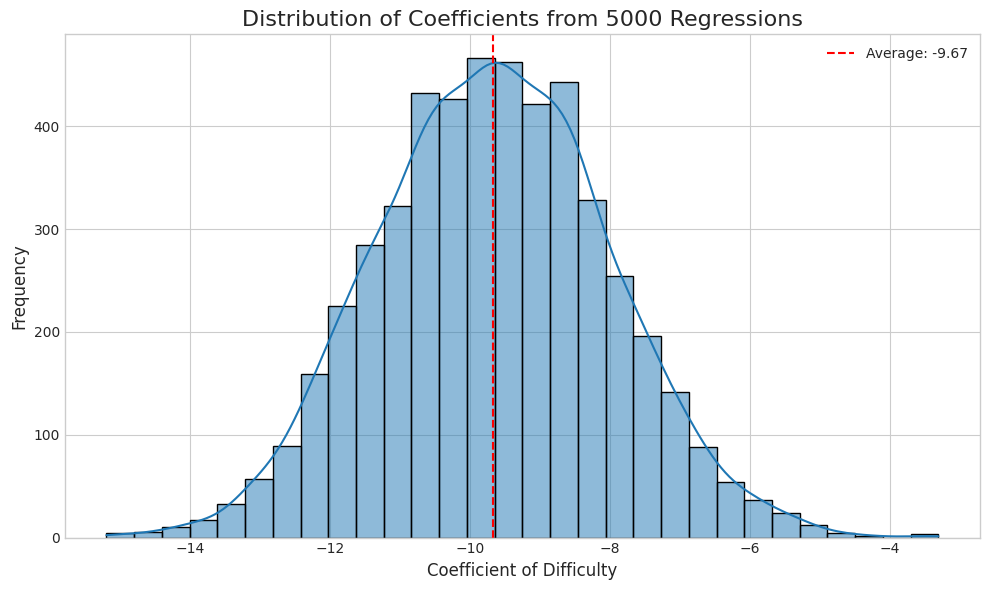

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def run_single_regression():
    """
    Generates a single dataset and runs a linear regression
    of speed on difficulty.

    Returns:
        float: The coefficient for the 'difficulty' variable.
    """
    num = 100

    # Generate data based on the causal relationships provided
    difficulty = np.random.uniform(0, 1, (num,))
    speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0)
    accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1)

    df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})

    # Prepare data for regression
    # We are predicting speed (y) using difficulty (X)
    X = df[['difficulty']]
    y = df['speed']

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Return the coefficient of the 'difficulty' predictor
    return model.coef_[0]

def run_experiment(num_trials=1000):
    """
    Runs the regression experiment multiple times to find the
    average coefficient.

    Args:
        num_trials (int): The number of times to run the simulation.

    Returns:
        list: A list of all the calculated coefficients.
    """
    coefficients = []
    for _ in range(num_trials):
        coef = run_single_regression()
        coefficients.append(coef)
    return coefficients

if __name__ == '__main__':
    # --- Main Execution ---
    num_experiments = 5000  # You can increase this for a more stable average
    all_coefficients = run_experiment(num_experiments)

    # Calculate and print the average coefficient
    average_coefficient = np.mean(all_coefficients)
    print(f"Ran {num_experiments} experiments.")
    print(f"Average coefficient of 'difficulty' on 'speed': {average_coefficient:.4f}")

    # --- Optional Visualization ---
    # This part visualizes the distribution of the coefficients
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.histplot(all_coefficients, kde=True, ax=ax, bins=30)
    ax.axvline(average_coefficient, color='red', linestyle='--', label=f'Average: {average_coefficient:.2f}')

    ax.set_title(f'Distribution of Coefficients from {num_experiments} Regressions', fontsize=16)
    ax.set_xlabel('Coefficient of Difficulty', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig('coefficient_distribution.png')
    print("\nSaved a plot of the coefficient distribution to 'coefficient_distribution.png'")


In [8]:
!pip install statsmodels
import statsmodels.api as sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 52.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


Summary (mean, std, 95% percentile interval):
{'mean_coef_on_X': np.float64(0.025938885140127536), 'std_coef_on_X': np.float64(0.005349163502078146), '2.5%_pct': np.float64(0.01538160599701129), '97.5%_pct': np.float64(0.03663682218003928), 'n_sims': 5000}


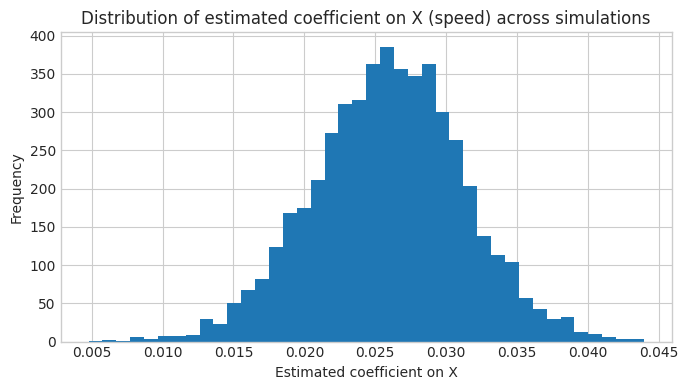

,coef_on_X
0,0.025866
1,0.028035
2,0.015412
3,0.018990
4,0.024535
5,0.027969
6,0.034401
7,0.028790
8,0.025795
9,0.028560


In [9]:
np.random.seed(42)

def simulate_one(n=100):
    difficulty = np.random.uniform(0, 1, n)
    speed = np.maximum(np.random.normal(15, 5, n) - difficulty * 10, 0)
    accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, n), 0), 1)
    df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})
    X = sm.add_constant(df[['speed', 'difficulty']])
    model = sm.OLS(df['accident'], X).fit()
    return model.params['speed']

# Run many simulations
n_sims = 5000
coefs = np.array([simulate_one(100) for _ in range(n_sims)])

mean_coef = coefs.mean()
std_coef = coefs.std(ddof=1)
ci_lower, ci_upper = np.percentile(coefs, [2.5, 97.5])

result_summary = {
    'mean_coef_on_X': mean_coef,
    'std_coef_on_X': std_coef,
    '2.5%_pct': ci_lower,
    '97.5%_pct': ci_upper,
    'n_sims': n_sims
}

result_df = pd.DataFrame({
    'coef_on_X': coefs
})

# Show summary and a small sample of coefficients
print("Summary (mean, std, 95% percentile interval):")
print(result_summary)

# Display a histogram
plt.figure(figsize=(7,4))
plt.hist(coefs, bins=40)
plt.title("Distribution of estimated coefficient on X (speed) across simulations")
plt.xlabel("Estimated coefficient on X")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Show the first few simulated coefficients in a table
result_df.head(10)

In [10]:
np.random.seed(42)

def simulate_one(n=100):
    difficulty = np.random.uniform(0, 1, n)
    speed = np.maximum(np.random.normal(15, 5, n) - difficulty * 10, 0)
    accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, n), 0), 1)
    df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})
    X = sm.add_constant(df[['speed', 'difficulty']])
    model = sm.OLS(df['accident'], X).fit()
    return model.params['speed']

# Settings
n_sims = 5000
coefs = np.array([simulate_one(100) for _ in range(n_sims)])

print("Mean coef on X (speed):", coefs.mean())
print("Std:", coefs.std(ddof=1))
print("95% percentile interval:", np.percentile(coefs, [2.5, 97.5]))


Mean coef on X (speed): 0.025938885140127536
Std: 0.005349163502078146
95% percentile interval: [0.01538161 0.03663682]
